In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#downloading kaggle dfdc dataset partitions
!wget --load-cookies kaggle.com_cookies.txt https://www.kaggle.com/c/16880/datadownload/dfdc_train_part_06.zip

--2021-12-06 17:21:57--  https://www.kaggle.com/c/16880/datadownload/dfdc_train_part_06.zip
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://storage.googleapis.com/kaggle-competitions-detached-data/16880/dfdc_train_part_06.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1639070518&Signature=oDMF1AT61%2FsI77jHDMQgx2gq3H28TUGB3%2Fz%2BR9WirVSELIOn7XIvEuzmHSlqUO1pUY6Igy3%2BwsIn3amDq0Iu3WWiIlprxDtfUO0NeFZofUaivkJBjq%2FemNrSdT7Iu57eIEikenxu0I%2BP%2FXk4xLlGiw7xIGU7zrk9n6tCtW9IuVeAscTQyA4Ssy%2Fhvef0SIwkPyZ%2BVJFfmZtcljsCUlvY4d9moI8U7Uybs7uepUBtjdRAN%2BfalYBnTlW8kldPxJvzNyTWXKzex7jA16TEK%2FjPxxHQWB5PUEoFN3Rsn3UX13y4iOzc%2FTyOomvCNh1TxAn%2BIxzsK27Ac7uY7%2FOWlLuLUQ%3D%3D [following]
--2021-12-06 17:21:58--  https://storage.googleapis.com/kaggle-competitions-detached-data/16880/dfdc_train_part_06.zip?GoogleAccessId=we

In [ ]:
!unzip dfdc_train_part_06.zip

In [ ]:
#code to split the videos into frames and store in separate directories
import dlib
import cv2
import os
import re
import json
from pylab import *
from PIL import Image, ImageChops, ImageEnhance

train_frame_folder = 'dfdc_train_part_6'
with open(os.path.join(train_frame_folder, 'metadata.json'), 'r') as file:
    data = json.load(file)
list_of_train_data = [f for f in os.listdir(train_frame_folder) if f.endswith('.mp4')]
detector = dlib.get_frontal_face_detector()
for vid in list_of_train_data:
    count = 0
    cap = cv2.VideoCapture(os.path.join(train_frame_folder, vid))
    frameRate = cap.get(5)
    while cap.isOpened():
        frameId = cap.get(1)
        ret, frame = cap.read()
        if ret != True:
            break
        if frameId % ((int(frameRate)+1)*1) == 0:
            face_rects, scores, idx = detector.run(frame, 0)
            for i, d in enumerate(face_rects):
                x1 = d.left()
                y1 = d.top()
                x2 = d.right()
                y2 = d.bottom()
                crop_img = frame[y1:y2, x1:x2]
                if data[vid]['label'] == 'REAL':
                    cv2.imwrite('/content/drive/MyDrive/testing_actual/real/'+vid.split('.')[0]+'_'+str(count)+'.png', cv2.resize(crop_img, (128, 128)))
                elif data[vid]['label'] == 'FAKE':
                    cv2.imwrite('/content/drive/MyDrive/testing_actual/fake/'+vid.split('.')[0]+'_'+str(count)+'.png', cv2.resize(crop_img, (128, 128)))
                count+=1

ImportError: ignored

Found 4107 images belonging to 2 classes.
Found 1473 images belonging to 2 classes.
80150528/80134624 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
129/129 [==============================] - 1032s 8s/step - loss: 0.4748 - accuracy: 0.7884 - val_loss: 0.3351 - val_accuracy: 0.8846
Epoch 2/10
129/129 [==============================] - 49s 377ms/step - loss: 0.2887 - accuracy: 0.8761 - val_loss: 0.4140 - val_accuracy: 0.8914
Epoch 3/10
129/129 [==============================] - 49s 377ms/step - loss: 0.1746 - accuracy: 0.9345 - val_loss: 0.4491 - val_accuracy: 0.8832
Epoch 4/10
129/129 [==============================] - 48s 374ms/step - loss: 0.1088 - accuracy: 0.9610 - val_loss: 0.5099 - val_accuracy: 0.8826
Epoch 5/10
129/129 [==============================] - 48s 375ms/step - loss: 0.0838 - accuracy: 0.9710 - val_loss: 0.5054 - val_accuracy: 0.8690
Epoch 6/10
129/129 [==============================] - 48s 374ms/step - loss: 0.0654 - accuracy: 0.9771 - val_loss: 0.7004 - val_accuracy: 0.8873
Epoch 7/10
129/129 [==============================] - 48s 374ms/step - loss: 0.0459 - accuracy: 0.9813 - val_loss: 0.6690 - val_acc

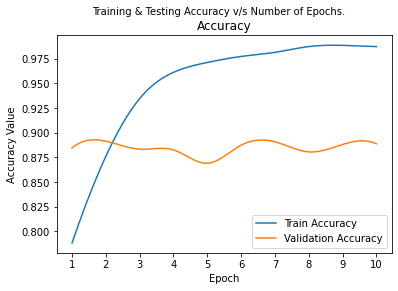

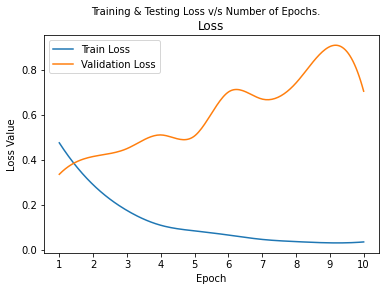

INFO:tensorflow:Assets written to: ./Reference_Data2/Model/VGG-19/assets


In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications import EfficientNetB7, ResNet101V2, VGG19
from tensorflow.keras.applications import Xception, InceptionResNetV2
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras.layers import Dense, Dropout, InputLayer, LeakyReLU
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from scipy.interpolate import make_interp_spline, BSpline


# common variables initialized

input_shape=(128, 128, 3)
batch_size = 32
epochs = 10
epoch_list = list(range(1, epochs+1))

# Path to training & testing set.

train_data = '/content/drive/MyDrive/training_actual'
test_data = '/content/drive/MyDrive/testing_actual'

# Training Data Generator.
train_datagen = ImageDataGenerator(rescale=1./255.)

# Testing Data Generator.
test_datagen = ImageDataGenerator(rescale=1./255.)

# Flow training images in batches of 64 using train_datagen generator
train_gen = train_datagen.flow_from_directory(train_data,
                                                    target_size=(128, 128),
                                                    batch_size=batch_size,
                                                    class_mode='binary')

# Flow test images in batches of 64 using test_datagen generator
test_gen = test_datagen.flow_from_directory(test_data,
                                                  target_size=(128, 128),
                                                  batch_size=batch_size,
                                                  class_mode='binary')


base_model = VGG19(input_shape = (128, 128, 3), include_top = False, weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = True

# Flatten the output layer to 1 dimension
x = Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = Dropout(0.5)(x)

# Add a final sigmoid layer for classification
x = Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.Adam(lr=1e-5), loss = 'binary_crossentropy', metrics = ['accuracy'])


# Early Stopping mechanism to stop training if the loss rate is unchanged for certain epochs.
reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, mode='auto')
early_stopping = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=0, mode='auto')

history = model.fit(train_gen,
                    epochs=epochs,
                    validation_data=test_gen)


network_name = "VGG-19"

try:
    os.mkdir("./Reference_Data2")
    os.mkdir("./Reference_Data2/Graphs")
    os.mkdir("./Reference_Data2/Summary")
    os.mkdir("./Reference_Data2/Model")
except OSError:
    pass

try:
    os.mkdir(os.path.join("./Reference_Data2/Graphs", network_name))
except OSError:
    pass

#define x as 200 equally spaced values between the min and max of original x
acc = np.linspace(min(epoch_list), max(epoch_list), 200)
val_acc = np.linspace(min(epoch_list), max(epoch_list), 200)

#define spline for accuracy
spl1 = make_interp_spline(epoch_list, history.history['accuracy'], k=3)
y_smooth1 = spl1(acc)
#define spline validation accuracy
spl2 = make_interp_spline(epoch_list, history.history['val_accuracy'], k=3)
y_smooth2 = spl2(val_acc)

#create smooth line chart
graph_1 = plt.subplots(1, 1)
plt.suptitle('Training & Testing Accuracy v/s Number of Epochs.', fontsize=10)
plt.plot(acc, y_smooth1, label='Train Accuracy')
plt.plot(val_acc, y_smooth2, label='Validation Accuracy')
plt.xticks(np.arange(1, epochs + 1, 1))
plt.ylabel('Accuracy Value')
plt.xlabel('Epoch')
plt.title('Accuracy')
plt.legend(loc="best")
plt.savefig(os.path.join("./Reference_Data2/Graphs", network_name, "AccuracyVEpochs.png"), dpi=300,
            bbox_inches='tight')

#define x as 200 equally spaced values between the min and max of original x
loss = np.linspace(min(epoch_list), max(epoch_list), 200)
val_loss = np.linspace(min(epoch_list), max(epoch_list), 200)

#define spline for loss
spl3 = make_interp_spline(epoch_list, history.history['loss'], k=3)
y_smooth3 = spl3(loss)
#define spline validation loss
spl4 = make_interp_spline(epoch_list, history.history['val_loss'], k=3)
y_smooth4 = spl4(val_loss)

#create smooth line chart
graph_2 = plt.subplots(1, 1)
plt.suptitle('Training & Testing Loss v/s Number of Epochs.', fontsize=10)
plt.plot(loss, y_smooth3, label='Train Loss')
plt.plot(val_loss, y_smooth4, label='Validation Loss')
plt.xticks(np.arange(1, epochs + 1, 1))
plt.ylabel('Loss Value')
plt.xlabel('Epoch')
plt.title('Loss')
plt.legend(loc="best")
plt.savefig(os.path.join("./Reference_Data2/Graphs", network_name, "LossVEpochs.png"), dpi=300,
            bbox_inches='tight')
plt.show()

# Saving model summary
with open("./Reference_Data2/Summary/" + network_name + "summary.txt", 'w+') as f:
    model.summary(print_fn=lambda x: f.write(x + '\n'))

# Saving the Model for Inference Purpose.
model.save('./Reference_Data2/Model/' + network_name + '/')
model.save('./Reference_Data2/Model/' + network_name + '/' + network_name + '.h5')

Found 4107 images belonging to 2 classes.
Found 1473 images belonging to 2 classes.
94683136/94668760 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
65/65 [==============================] - 47s 578ms/step - loss: 0.6592 - accuracy: 0.6304 - val_loss: 0.6323 - val_accuracy: 0.6599
Epoch 2/10
65/65 [==============================] - 34s 524ms/step - loss: 0.5897 - accuracy: 0.6900 - val_loss: 0.6029 - val_accuracy: 0.6640
Epoch 3/10
65/65 [==============================] - 34s 523ms/step - loss: 0.5412 - accuracy: 0.7404 - val_loss: 0.5588 - val_accuracy: 0.7054
Epoch 4/10
65/65 [==============================] - 34s 521ms/step - loss: 0.5009 - accuracy: 0.7794 - val_loss: 0.5106 - val_accuracy: 0.7651
Epoch 5/10
65/65 [==============================] - 34s 520ms/step - loss: 0.4620 - accuracy: 0.8052 - val_loss: 0.4813 - val_accuracy: 0.7957
Epoch 6/10
65/65 [==============================] - 34s 519ms/step - loss: 0.4289 - accuracy: 0.8391 - val_loss: 0.4600 - val_accuracy: 0.8133
Epoch 7/10
65/65 [==============================] - 34s 520ms/step - loss: 0.3952 - accuracy: 0.8639 - val_loss: 0.4381 - val_accuracy: 0.8303

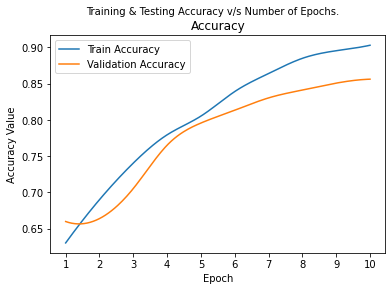

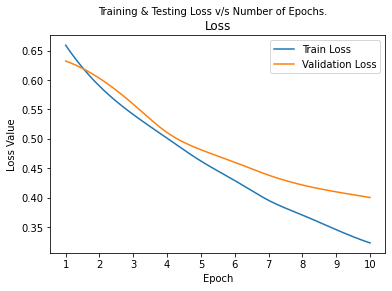

INFO:tensorflow:Assets written to: ./Reference_Data4/Model/ResNet50V2/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB7, ResNet50V2, VGG19
from tensorflow.keras.applications import Xception, InceptionResNetV2
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import Dense, Dropout, InputLayer
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from scipy.interpolate import make_interp_spline, BSpline


# Initializing the Common Variables.
input_shape = (128, 128, 3)
batch_size = 64
epochs = 10
epoch_list = list(range(1, epochs+1))

# Path to training & testing set.

train_data = '/content/drive/MyDrive/training_actual'
test_data = '/content/drive/MyDrive/testing_actual'

# Training Data Generator.
train_datagen = ImageDataGenerator(rescale=1./255.)

# Testing Data Generator.
test_datagen = ImageDataGenerator(rescale=1./255.)

# Flow training images in batches of 64 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_data,
                                                    target_size=(128, 128),
                                                    batch_size=batch_size,
                                                    class_mode='binary')

# Flow test images in batches of 64 using test_datagen generator
test_generator = test_datagen.flow_from_directory(test_data,
                                                    target_size=(128, 128),
                                                    batch_size=batch_size,
                                                    class_mode='binary')


# Loading the Neural Network & Pre-Trained Weights.
ResNet50V2_model = ResNet50V2(input_shape=input_shape, include_top=False, weights="imagenet", classes=2)

for i in range(50):
    l = ResNet50V2_model.get_layer(index=i)
    l.trainable = True

# Extending the Neural Network Sequentially.
model = Sequential()
model.add(ResNet50V2_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(units=1, activation='sigmoid'))

# Compiling the Model.
model.compile(loss='binary_crossentropy',
                optimizer=optimizers.Adam(lr=1e-6, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0),
                metrics=['accuracy'])


# Early Stopping mechanism to stop training if the loss rate is unchanged for certain epochs.
reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, mode='auto')
early_stopping = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=0, mode='auto')

# Starting the Training.
history = model.fit(train_generator, epochs=epochs, validation_data=test_generator)


# Plotting the graphs
network_name = "ResNet50V2"

try:
    os.mkdir("./Reference_Data4")
    os.mkdir("./Reference_Data4/Graphs")
    os.mkdir("./Reference_Data4/Summary")
    os.mkdir("./Reference_Data4/Model")
except OSError:
    pass

try:
    os.mkdir(os.path.join("./Reference_Data4/Graphs", network_name))
except OSError:
    pass

#define x as 200 equally spaced values between the min and max of original x
acc = np.linspace(min(epoch_list), max(epoch_list), 200)
val_acc = np.linspace(min(epoch_list), max(epoch_list), 200)

#define spline for accuracy
spl1 = make_interp_spline(epoch_list, history.history['accuracy'], k=3)
y_smooth1 = spl1(acc)
#define spline accuracy
spl2 = make_interp_spline(epoch_list, history.history['val_accuracy'], k=3)
y_smooth2 = spl2(val_acc)

#create smooth line chart
graph_1 = plt.subplots(1, 1)
plt.suptitle('Training & Testing Accuracy v/s Number of Epochs.', fontsize=10)
plt.plot(acc, y_smooth1, label='Train Accuracy')
plt.plot(val_acc, y_smooth2, label='Validation Accuracy')
plt.xticks(np.arange(1, epochs + 1, 1))
plt.ylabel('Accuracy Value')
plt.xlabel('Epoch')
plt.title('Accuracy')
plt.legend(loc="best")
plt.savefig(os.path.join("./Reference_Data4/Graphs", network_name, "AccuracyVEpochs.png"), dpi=300,
            bbox_inches='tight')

#define x as 200 equally spaced values between the min and max of original x
loss = np.linspace(min(epoch_list), max(epoch_list), 200)
val_loss = np.linspace(min(epoch_list), max(epoch_list), 200)

#define spline for accuracy
spl3 = make_interp_spline(epoch_list, history.history['loss'], k=3)
y_smooth3 = spl3(loss)
#define spline accuracy
spl4 = make_interp_spline(epoch_list, history.history['val_loss'], k=3)
y_smooth4 = spl4(val_loss)

#create smooth line chart
graph_2 = plt.subplots(1, 1)
plt.suptitle('Training & Testing Loss v/s Number of Epochs.', fontsize=10)
plt.plot(loss, y_smooth3, label='Train Loss')
plt.plot(val_loss, y_smooth4, label='Validation Loss')
plt.xticks(np.arange(1, epochs + 1, 1))
plt.ylabel('Loss Value')
plt.xlabel('Epoch')
plt.title('Loss')
plt.legend(loc="best")
plt.savefig(os.path.join("./Reference_Data4/Graphs", network_name, "LossVEpochs.png"), dpi=300,
            bbox_inches='tight')
plt.show()


# Saving model summary
with open("./Reference_Data4/Summary/" + network_name + "summary.txt", 'w+') as f:
    model.summary(print_fn=lambda x: f.write(x + '\n'))

# Saving the Model for Inference Purpose.
model.save('./Reference_Data4/Model/' + network_name + '/')
model.save('./Reference_Data4/Model/' + network_name + '/' + network_name + '.h5')

Found 4107 images belonging to 2 classes.
Found 1473 images belonging to 2 classes.
83697664/83683744 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
129/129 [==============================] - 74s 492ms/step - loss: 0.6360 - accuracy: 0.6905 - val_loss: 0.4429 - val_accuracy: 0.8921
Epoch 2/10
129/129 [==============================] - 61s 471ms/step - loss: 0.5626 - accuracy: 0.7721 - val_loss: 0.4209 - val_accuracy: 0.8927
Epoch 3/10
129/129 [==============================] - 61s 471ms/step - loss: 0.5233 - accuracy: 0.7908 - val_loss: 0.4094 - val_accuracy: 0.8927
Epoch 4/10
129/129 [==============================] - 61s 470ms/step - loss: 0.4962 - accuracy: 0.8001 - val_loss: 0.3955 - val_accuracy: 0.8927
Epoch 5/10
129/129 [==============================] - 61s 470ms/step - loss: 0.4688 - accuracy: 0.8123 - val_loss: 0.3839 - val_accuracy: 0.8921
Epoch 6/10
129/129 [==============================] - 61s 471ms/step - loss: 0.4418 - accuracy: 0.8164 - val_loss: 0.3782 - val_accuracy: 0.8927
Epoch 7/10
129/129 [==============================] - 61s 470ms/step - loss: 0.4206 - accuracy: 0.8208 - val_loss: 0.3734 - val_ac

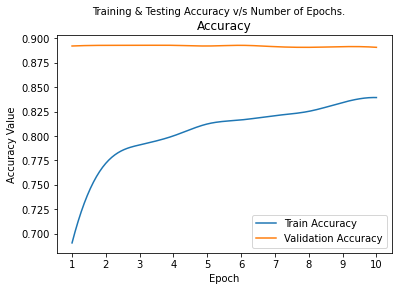

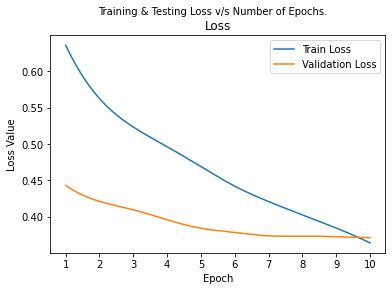

INFO:tensorflow:Assets written to: ./Reference_Data/Model/Xception/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications import EfficientNetB7, ResNet101V2, VGG19
from tensorflow.keras.applications import Xception, InceptionResNetV2
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras.layers import Dense, Dropout, InputLayer, LeakyReLU
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from scipy.interpolate import make_interp_spline, BSpline


# Initializing the Common Variables.

input_shape=(128, 128, 3)
batch_size = 32
epochs = 10
epoch_list = list(range(1, epochs+1))



train_data = '/content/drive/MyDrive/training_actual'
test_data = '/content/drive/MyDrive/testing_actual'

# Training Data Generator.
train_datagen = ImageDataGenerator(rescale=1./255.)

# Testing Data Generator.
test_datagen = ImageDataGenerator(rescale=1./255.)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_data,
                                                    target_size=(128, 128),
                                                    batch_size=batch_size,
                                                    class_mode='binary')

# Flow test images in batches of 64 using test_datagen generator
test_generator = test_datagen.flow_from_directory(test_data,
                                                  target_size=(128, 128),
                                                  batch_size=batch_size,
                                                  class_mode='binary')


# Defining the base nodel

base_model = Xception(input_shape = (128, 128, 3), include_top = False, weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = True

# Flatten the output layer to 1 dimension
x = Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = Dropout(0.5)(x)

# Add a final sigmoid layer for classification
x = Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.Adam(lr=1e-6), loss = 'binary_crossentropy', metrics = ['accuracy'])


# Early Stopping mechanism to stop training if the loss rate is unchanged for certain epochs.
reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, mode='auto')
early_stopping = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=0, mode='auto')

history = model.fit(train_generator,
                    epochs=epochs,
                    validation_data=test_generator)
# history = model.fit(train_generator, validation_data = test_generator, steps_per_epoch = 100, epochs = epochs)


# Just edit network_name while changing the training network, i.e.,Xception, Resnet, etc..
network_name = "Xception"

try:
    os.mkdir("./Reference_Data")
    os.mkdir("./Reference_Data/Graphs")
    os.mkdir("./Reference_Data/Summary")
    os.mkdir("./Reference_Data/Model")
except OSError:
    pass

try:
    os.mkdir(os.path.join("./Reference_Data/Graphs", network_name))
except OSError:
    pass

#define x as 200 equally spaced values between the min and max of original x
acc = np.linspace(min(epoch_list), max(epoch_list), 200)
val_acc = np.linspace(min(epoch_list), max(epoch_list), 200)

#define spline for accuracy
spl1 = make_interp_spline(epoch_list, history.history['accuracy'], k=3)
y_smooth1 = spl1(acc)
#define spline validation accuracy
spl2 = make_interp_spline(epoch_list, history.history['val_accuracy'], k=3)
y_smooth2 = spl2(val_acc)

#create smooth line chart
graph_1 = plt.subplots(1, 1)
plt.suptitle('Training & Testing Accuracy v/s Number of Epochs.', fontsize=10)
plt.plot(acc, y_smooth1, label='Train Accuracy')
plt.plot(val_acc, y_smooth2, label='Validation Accuracy')
plt.xticks(np.arange(1, epochs + 1, 1))
plt.ylabel('Accuracy Value')
plt.xlabel('Epoch')
plt.title('Accuracy')
plt.legend(loc="best")
plt.savefig(os.path.join("./Reference_Data/Graphs", network_name, "AccuracyVEpochs.png"), dpi=300,
            bbox_inches='tight')

#define x as 200 equally spaced values between the min and max of original x
loss = np.linspace(min(epoch_list), max(epoch_list), 200)
val_loss = np.linspace(min(epoch_list), max(epoch_list), 200)

#define spline for loss
spl3 = make_interp_spline(epoch_list, history.history['loss'], k=3)
y_smooth3 = spl3(loss)
#define spline validation loss
spl4 = make_interp_spline(epoch_list, history.history['val_loss'], k=3)
y_smooth4 = spl4(val_loss)

#create smooth line chart
graph_2 = plt.subplots(1, 1)
plt.suptitle('Training & Testing Loss v/s Number of Epochs.', fontsize=10)
plt.plot(loss, y_smooth3, label='Train Loss')
plt.plot(val_loss, y_smooth4, label='Validation Loss')
plt.xticks(np.arange(1, epochs + 1, 1))
plt.ylabel('Loss Value')
plt.xlabel('Epoch')
plt.title('Loss')
plt.legend(loc="best")
plt.savefig(os.path.join("./Reference_Data/Graphs", network_name, "LossVEpochs.png"), dpi=300,
            bbox_inches='tight')
plt.show()

# Saving model summary
with open("./Reference_Data/Summary/" + network_name + "summary.txt", 'w+') as f:
    model.summary(print_fn=lambda x: f.write(x + '\n'))

# Saving the Model for Inference Purpose.
model.save('./Reference_Data/Model/' + network_name + '/')
model.save('./Reference_Data/Model/' + network_name + '/' + network_name + '.h5')

Found 4107 images belonging to 2 classes.
Found 1473 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
65/65 [==============================] - 18s 257ms/step - loss: 1.1143 - accuracy: 0.6601 - val_loss: 0.6419 - val_accuracy: 0.8927
Epoch 2/10
65/65 [==============================] - 16s 248ms/step - loss: 0.8052 - accuracy: 0.6689 - val_loss: 0.4827 - val_accuracy: 0.8927
Epoch 3/10
65/65 [==============================] - 16s 246ms/step - loss: 0.7728 - accuracy: 0.6805 - val_loss: 0.3707 - val_accuracy: 0.8927
Epoch 4/10
65/65 [==============================] - 16s 245ms/step - loss: 0.7048 - accuracy: 0.6995 - val_loss: 0.3566 - val_accuracy: 0.8927
Epoch 5/10
65/65 [==============================] - 16s 245ms/step - loss: 0.6349 - accuracy: 0.7178 - val_loss: 0.3899 - val_accuracy: 0.8927
Epoch 6/10
65/65 [==============================] - 16s 243ms/step - loss: 0.6103 - accuracy: 0.7314 - val_loss: 0.4481 - val_accuracy: 0.8181
Epoch 7/10
65/65 [==============================] - 16s 243ms/step - loss: 0.6053 - accuracy: 0.7268 - val_loss: 0.4803 - val_accuracy: 0.7359

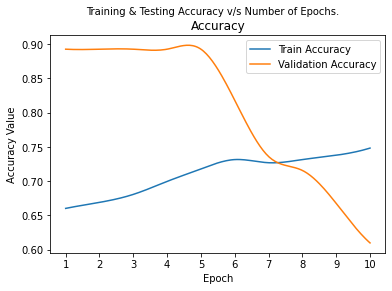

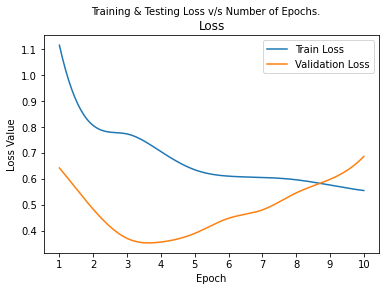

INFO:tensorflow:Assets written to: ./Reference_Data3/Model/Mesonet/assets


In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications import EfficientNetB7, ResNet101V2, VGG19
from tensorflow.keras.applications import Xception, InceptionResNetV2
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras.layers import Dense, Dropout, InputLayer, LeakyReLU
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from scipy.interpolate import make_interp_spline, BSpline


class myCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy')>0.95 or logs.get('val_accuracy')>0.95):
            print('\nDesired Accuracy of 95% has been reached, therefore cancelling Training!!')
            self.model.stop_training = True

callbacks = myCallbacks()


# Initializing the Common Variables.

input_shape=(128, 128, 3)
batch_size = 64
epochs = 10
epoch_list = list(range(1, epochs+1))

# Path to training & testing set.

train_data = '/content/drive/MyDrive/training_actual'
test_data = '/content/drive/MyDrive/testing_actual'

# Training Data Generator.
train_datagen = ImageDataGenerator(rescale=1./255.)

# Testing Data Generator.
test_datagen = ImageDataGenerator(rescale=1./255.)

# Flow training images in batches of 64 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_data,
                                                    target_size=(128, 128),
                                                    batch_size=batch_size,
                                                    class_mode='binary')

# Flow test images in batches of 64 using test_datagen generator
test_generator = test_datagen.flow_from_directory(test_data,
                                                  target_size=(128, 128),
                                                  batch_size=batch_size,
                                                  class_mode='binary')


# DEFINING AND COMPILING MESONET MODEL
model = Sequential([
    Conv2D(8, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Conv2D(8, (5, 5), padding='same', activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), padding='same'),

    Conv2D(16, (5, 5), padding='same', activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), padding='same'),

    Conv2D(16, (5, 5), padding='same', activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(4, 4), padding='same'),

    Flatten(),
    Dropout(0.5),
    Dense(16),
    LeakyReLU(alpha=0.1),
    Dropout(0.5),
    Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])


# Early Stopping mechanism to stop training if the loss rate is unchanged for certain epochs.
reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, mode='auto')
early_stopping = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=0, mode='auto')

history = model.fit(train_generator,
                    epochs=epochs,
                    verbose=1,
                    validation_data=test_generator,
                    callbacks=[callbacks])


# Just edit network_name while changing the training network, i.e.,Xception, Resnet, etc..
network_name = "Mesonet"

try:
    os.mkdir("./Reference_Data3")
    os.mkdir("./Reference_Data3/Graphs")
    os.mkdir("./Reference_Data3/Summary")
    os.mkdir("./Reference_Data3/Model")
except OSError:
    pass

try:
    os.mkdir(os.path.join("./Reference_Data3/Graphs", network_name))
except OSError:
    pass

#define x as 200 equally spaced values between the min and max of original epoch list
acc = np.linspace(min(epoch_list), max(epoch_list), 200)
val_acc = np.linspace(min(epoch_list), max(epoch_list), 200)

#define spline for accuracy
spl1 = make_interp_spline(epoch_list, history.history['accuracy'], k=3)
y_smooth1 = spl1(acc)
#define spline accuracy
spl2 = make_interp_spline(epoch_list, history.history['val_accuracy'], k=3)
y_smooth2 = spl2(val_acc)

#create smooth line chart
graph_1 = plt.subplots(1, 1)
plt.suptitle('Training & Testing Accuracy v/s Number of Epochs.', fontsize=10)
plt.plot(acc, y_smooth1, label='Train Accuracy')
plt.plot(val_acc, y_smooth2, label='Validation Accuracy')
plt.xticks(np.arange(1, epochs + 1, 1))
plt.ylabel('Accuracy Value')
plt.xlabel('Epoch')
plt.title('Accuracy')
plt.legend(loc="best")
plt.savefig(os.path.join("./Reference_Data3/Graphs", network_name, "AccuracyVEpochs.png"), dpi=300,
            bbox_inches='tight')

#define x as 200 equally spaced values between the min and max of original epoch list
loss = np.linspace(min(epoch_list), max(epoch_list), 200)
val_loss = np.linspace(min(epoch_list), max(epoch_list), 200)

#define spline for accuracy
spl3 = make_interp_spline(epoch_list, history.history['loss'], k=3)
y_smooth3 = spl3(loss)
#define spline accuracy
spl4 = make_interp_spline(epoch_list, history.history['val_loss'], k=3)
y_smooth4 = spl4(val_loss)

#create smooth line chart
graph_2 = plt.subplots(1, 1)
plt.suptitle('Training & Testing Loss v/s Number of Epochs.', fontsize=10)
plt.plot(loss, y_smooth3, label='Train Loss')
plt.plot(val_loss, y_smooth4, label='Validation Loss')
plt.xticks(np.arange(1, epochs + 1, 1))
plt.ylabel('Loss Value')
plt.xlabel('Epoch')
plt.title('Loss')
plt.legend(loc="best")
plt.savefig(os.path.join("./Reference_Data3/Graphs", network_name, "LossVEpochs.png"), dpi=300,
            bbox_inches='tight')
plt.show()

# Saving model summary
with open("./Reference_Data3/Summary/" + network_name + "summary.txt", 'w+') as f:
    model.summary(print_fn=lambda x: f.write(x + '\n'))

# Saving the Model for Inference Purpose.
model.save('./Reference_Data3/Model/' + network_name + '/')
model.save('./Reference_Data3/Model/' + network_name + '/' + network_name + '.h5')

# CNN + LSTM model

In [ ]:
!pip3 install face_recognition

     |████████████████████████████████| 100.1 MB 20 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=91ef20eadefd89d5af0d5f581423f60c11a41ee4b2cea916bac894c0565e74c2
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [ ]:
#to load preprocessod video to memory
import json
import glob
import numpy as np
import cv2
import copy
import random
video_files =  glob.glob('/content/drive/My Drive/Celeb_fake_face_only/*.mp4')
video_files += glob.glob('/content/drive/My Drive/Celeb_real_face_only/*.mp4')
"""video_files += glob.glob('/content/drive/My Drive/DFDC_FAKE_Face_only_data/*.mp4')
video_files += glob.glob('/content/drive/My Drive/DFDC_REAL_Face_only_data/*.mp4')
video_files += glob.glob('/content/drive/My Drive/FF_Face_only_data/*.mp4')"""
random.shuffle(video_files)
random.shuffle(video_files)
frame_count = []
for video_file in video_files:
  cap = cv2.VideoCapture(video_file)
  if(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))<100):
    video_files.remove(video_file)
    continue
  frame_count.append(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
print("frames are " , frame_count)
print("Total no of video: " , len(frame_count))
print('Average frame per video:',np.mean(frame_count))

frames are  [148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 134, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 14

In [ ]:
# load the video name and labels from csv
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
class video_dataset(Dataset):
    def __init__(self,video_names,labels,sequence_length = 60,transform = None):
        self.video_names = video_names
        self.labels = labels
        self.transform = transform
        self.count = sequence_length
    def __len__(self):
        return len(self.video_names)
    def __getitem__(self,idx):
        video_path = self.video_names[idx]
        frames = []
        a = int(100/self.count)
        first_frame = np.random.randint(0,a)
        temp_video = video_path.split('/')[-1]
        #print(temp_video)
        label = self.labels.iloc[(labels.loc[labels["file"] == temp_video].index.values[0]),1]
        if(label == 'FAKE'):
          label = 0
        if(label == 'REAL'):
          label = 1
        for i,frame in enumerate(self.frame_extract(video_path)):
          frames.append(self.transform(frame))
          if(len(frames) == self.count):
            break
        frames = torch.stack(frames)
        frames = frames[:self.count]
        #print("length:" , len(frames), "label",label)
        return frames,label
    def frame_extract(self,path):
      vidObj = cv2.VideoCapture(path)
      success = 1
      while success:
          success, image = vidObj.read()
          if success:
              yield image
#plot the image
def im_plot(tensor):
    image = tensor.cpu().numpy().transpose(1,2,0)
    b,g,r = cv2.split(image)
    image = cv2.merge((r,g,b))
    image = image*[0.22803, 0.22145, 0.216989] +  [0.43216, 0.394666, 0.37645]
    image = image*255.0
    plt.imshow(image.astype(int))
    plt.show()

In [ ]:
#count the number of fake and real videos
def number_of_real_and_fake_videos(data_list):
  header_list = ["file","label"]
  lab = pd.read_csv('Gobal_metadata.csv',names=header_list)
  fake = 0
  real = 0
  for i in data_list:
    temp_video = i.split('/')[-1]
    label = lab.iloc[(labels.loc[labels["file"] == temp_video].index.values[0]),1]
    if(label == 'FAKE'):
      fake+=1
    if(label == 'REAL'):
      real+=1
  return real,fake

train :  934
test :  234
TRAIN:  Real: 467  Fake: 467


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


TEST:  Real: 121  Fake: 113


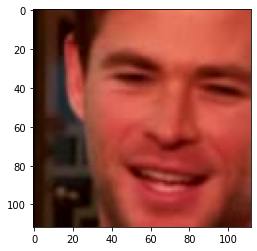

In [ ]:
# load the labels and video in data loader
import random
import pandas as pd
from sklearn.model_selection import train_test_split

header_list = ["file","label"]
labels = pd.read_csv('Gobal_metadata.csv',names=header_list)
#print(labels)
train_videos = video_files[:int(0.8*len(video_files))]
valid_videos = video_files[int(0.8*len(video_files)):]
print("train : " , len(train_videos))
print("test : " , len(valid_videos))
# train_videos,valid_videos = train_test_split(data,test_size = 0.2)
# print(train_videos)

print("TRAIN: ", "Real:",number_of_real_and_fake_videos(train_videos)[0]," Fake:",number_of_real_and_fake_videos(train_videos)[1])
print("TEST: ", "Real:",number_of_real_and_fake_videos(valid_videos)[0]," Fake:",number_of_real_and_fake_videos(valid_videos)[1])


im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

test_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])
train_data = video_dataset(train_videos,labels,sequence_length = 10,transform = train_transforms)
#print(train_data)
val_data = video_dataset(valid_videos,labels,sequence_length = 10,transform = train_transforms)
train_loader = DataLoader(train_data,batch_size = 4,shuffle = True,num_workers = 4)
valid_loader = DataLoader(val_data,batch_size = 4,shuffle = True,num_workers = 4)
image,label = train_data[0]
im_plot(image[0,:,:,:])

In [ ]:
#Model with feature visualization
from torch import nn
from torchvision import models
class Model(nn.Module):
    def __init__(self, num_classes,latent_dim= 2048, lstm_layers=1 , hidden_dim = 2048, bidirectional = False):
        super(Model, self).__init__()
        model = models.resnext50_32x4d(pretrained = True) #Residual Network CNN
        self.model = nn.Sequential(*list(model.children())[:-2])
        self.lstm = nn.LSTM(latent_dim,hidden_dim, lstm_layers,  bidirectional)
        self.relu = nn.LeakyReLU()
        self.dp = nn.Dropout(0.4)
        self.linear1 = nn.Linear(2048,num_classes)
        self.avgpool = nn.AdaptiveAvgPool2d(1)
    def forward(self, x):
        batch_size,seq_length, c, h, w = x.shape
        x = x.view(batch_size * seq_length, c, h, w)
        fmap = self.model(x)
        x = self.avgpool(fmap)
        x = x.view(batch_size,seq_length,2048)
        x_lstm,_ = self.lstm(x,None)
        return fmap,self.dp(self.linear1(torch.mean(x_lstm,dim = 1)))

In [ ]:
model = Model(2).cuda()
a,b = model(torch.from_numpy(np.empty((1,20,3,112,112))).type(torch.cuda.FloatTensor))

Downloading: "https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth" to /root/.cache/torch/hub/checkpoints/resnext50_32x4d-7cdf4587.pth


  0%|          | 0.00/95.8M [00:00<?, ?B/s]

In [ ]:
import torch
from torch.autograd import Variable
import time
import os
import sys
import os
def train_epoch(epoch, num_epochs, data_loader, model, criterion, optimizer):
    model.train()
    losses = AverageMeter()
    accuracies = AverageMeter()
    t = []
    for i, (inputs, targets) in enumerate(data_loader):
        if torch.cuda.is_available():
            targets = targets.type(torch.cuda.LongTensor)
            inputs = inputs.cuda()
        _,outputs = model(inputs)
        loss  = criterion(outputs,targets.type(torch.cuda.LongTensor))
        acc = calculate_accuracy(outputs, targets.type(torch.cuda.LongTensor))
        losses.update(loss.item(), inputs.size(0))
        accuracies.update(acc, inputs.size(0))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        sys.stdout.write(
                "\r[Epoch %d/%d] [Batch %d / %d] [Loss: %f, Acc: %.2f%%]"
                % (
                    epoch,
                    num_epochs,
                    i,
                    len(data_loader),
                    losses.avg,
                    accuracies.avg))
    torch.save(model.state_dict(),'/content/checkpoint.pt')
    return losses.avg,accuracies.avg
def test(epoch,model, data_loader ,criterion):
    print('Testing')
    model.eval()
    losses = AverageMeter()
    accuracies = AverageMeter()
    pred = []
    true = []
    count = 0
    with torch.no_grad():
        for i, (inputs, targets) in enumerate(data_loader):
            if torch.cuda.is_available():
                targets = targets.cuda().type(torch.cuda.FloatTensor)
                inputs = inputs.cuda()
            _,outputs = model(inputs)
            loss = torch.mean(criterion(outputs, targets.type(torch.cuda.LongTensor)))
            acc = calculate_accuracy(outputs,targets.type(torch.cuda.LongTensor))
            _,p = torch.max(outputs,1)
            true += (targets.type(torch.cuda.LongTensor)).detach().cpu().numpy().reshape(len(targets)).tolist()
            pred += p.detach().cpu().numpy().reshape(len(p)).tolist()
            losses.update(loss.item(), inputs.size(0))
            accuracies.update(acc, inputs.size(0))
            sys.stdout.write(
                    "\r[Batch %d / %d]  [Loss: %f, Acc: %.2f%%]"
                    % (
                        i,
                        len(data_loader),
                        losses.avg,
                        accuracies.avg
                        )
                    )
        print('\nAccuracy {}'.format(accuracies.avg))
    return true,pred,losses.avg,accuracies.avg
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()
    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count
def calculate_accuracy(outputs, targets):
    batch_size = targets.size(0)

    _, pred = outputs.topk(1, 1, True)
    pred = pred.t()
    correct = pred.eq(targets.view(1, -1))
    n_correct_elems = correct.float().sum().item()
    return 100* n_correct_elems / batch_size

In [ ]:
import seaborn as sn
#Output confusion matrix
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])
    print('\n')
    df_cm = pd.DataFrame(cm, range(2), range(2))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
    plt.ylabel('Actual label', size = 20)
    plt.xlabel('Predicted label', size = 20)
    plt.xticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.yticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.ylim([2, 0])
    plt.show()
    calculated_acc = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+ cm[1][1])
    print("Calculated Accuracy",calculated_acc*100)

In [ ]:
def plot_loss(train_loss_avg,test_loss_avg,num_epochs):
  loss_train = train_loss_avg
  loss_val = test_loss_avg
  print(num_epochs)
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training loss')
  plt.plot(epochs, loss_val, 'b', label='validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
def plot_accuracy(train_accuracy,test_accuracy,num_epochs):
  loss_train = train_accuracy
  loss_val = test_accuracy
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training accuracy')
  plt.plot(epochs, loss_val, 'b', label='validation accuracy')
  plt.title('Training and Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[Epoch 1/20] [Batch 233 / 234] [Loss: 0.693308, Acc: 53.43%]Testing
[Batch 58 / 59]  [Loss: 0.651758, Acc: 64.10%]
Accuracy 64.1025641025641
[Epoch 2/20] [Batch 233 / 234] [Loss: 0.547564, Acc: 72.59%]Testing
[Batch 58 / 59]  [Loss: 0.461851, Acc: 76.50%]
Accuracy 76.4957264957265
[Epoch 3/20] [Batch 233 / 234] [Loss: 0.477418, Acc: 77.52%]Testing
[Batch 58 / 59]  [Loss: 0.458580, Acc: 79.06%]
Accuracy 79.05982905982906
[Epoch 4/20] [Batch 233 / 234] [Loss: 0.383294, Acc: 80.73%]Testing
[Batch 58 / 59]  [Loss: 0.450476, Acc: 80.34%]
Accuracy 80.34188034188034
[Epoch 5/20] [Batch 233 / 234] [Loss: 0.426948, Acc: 80.19%]Testing
[Batch 58 / 59]  [Loss: 0.346014, Acc: 85.47%]
Accuracy 85.47008547008546
[Epoch 6/20] [Batch 233 / 234] [Loss: 0.367293, Acc: 82.66%]Testing
[Batch 58 / 59]  [Loss: 0.417227, Acc: 84.19%]
Accuracy 84.1880341880342
[Epoch 7/20] [Batch 233 / 234] [Loss: 0.352507, Acc: 82.98%]Testing
[Batch 58 / 59]  [Loss: 0.410397, Acc: 82.48%]
Accuracy 82.47863247863248
[Epoch 8/

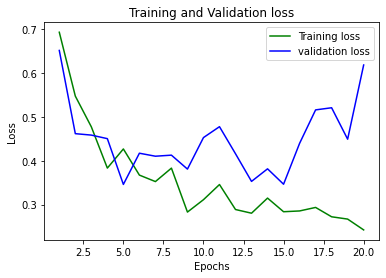

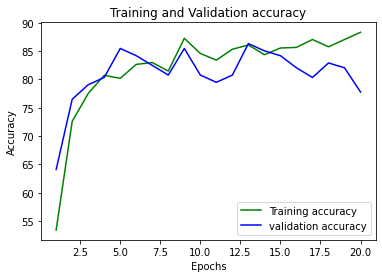

[[109   4]
 [ 48  73]]
True positive =  109
False positive =  4
False negative =  48
True negative =  73




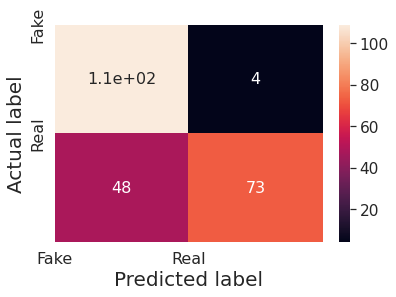

Calculated Accuracy 77.77777777777779


In [ ]:
from sklearn.metrics import confusion_matrix
#learning rate
lr = 1e-5#0.001
#number of epochs
num_epochs = 20

optimizer = torch.optim.Adam(model.parameters(), lr= lr,weight_decay = 1e-5)

#class_weights = torch.from_numpy(np.asarray([1,15])).type(torch.FloatTensor).cuda()
#criterion = nn.CrossEntropyLoss(weight = class_weights).cuda()
criterion = nn.CrossEntropyLoss().cuda()
train_loss_avg =[]
train_accuracy = []
test_loss_avg = []
test_accuracy = []
for epoch in range(1,num_epochs+1):
    l, acc = train_epoch(epoch,num_epochs,train_loader,model,criterion,optimizer)
    train_loss_avg.append(l)
    train_accuracy.append(acc)
    true,pred,tl,t_acc = test(epoch,model,valid_loader,criterion)
    test_loss_avg.append(tl)
    test_accuracy.append(t_acc)
plot_loss(train_loss_avg,test_loss_avg,len(train_loss_avg))
plot_accuracy(train_accuracy,test_accuracy,len(train_accuracy))
print(confusion_matrix(true,pred))
print_confusion_matrix(true,pred)